# Metro Bike Share 
## by Ashwin Paramashivan

## Preliminary Wrangling
This imformation is from the website called bikeshare.metro. This data provides total duration and the location of the bicycle. It also provides the latitude and the longituide of the location of the station where the bike originated and
where the bike ended. There are multiple files and multiple years for this data set. Each file in the website only represents a quarter. In this project I am going to be analyzing the data for the number of bike users for the year 2019 in Los Angeles, California. 


In [130]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load the data set and create 4 different dataframes

In [131]:
#load all the data sets for year 2019 and store them into data frame.
q1 = pd.read_csv('metro-bike-share-trips-2019-q1.csv')
q2 = pd.read_csv('metro-bike-share-trips-2019-q2.csv')
q3 = pd.read_csv('metro-bike-share-trips-2019-q3.csv')
q4 = pd.read_csv('metro-bike-share-trips-2019-q4.csv')

### Clean and Merge the dataframes

### Quality Issue 1: Add a column for season on 4 different dataframes

In [132]:
q1['season'] = pd.Series('1', index=q1.index)
q2['season'] = pd.Series('2', index=q2.index)
q3['season'] = pd.Series('3', index=q3.index)
q4['season'] = pd.Series('4', index=q4.index)

### Tidiness Issue 1:  Merge all four data frames into one dataframe

In [133]:
bikedata2019 = q1.append([q2, q3, q4])

In [134]:
bikedata2019.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,season
0,112536773,7,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,34.052872,-118.24749,3051,34.045422,-118.253517,06468,1,One Way,Walk-up,standard,1
1,112536772,6,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,34.052872,-118.24749,3051,34.045422,-118.253517,12311,1,One Way,Walk-up,standard,1
2,112538689,32,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,05992,1,One Way,Walk-up,standard,1
3,112538688,30,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,05860,1,One Way,Walk-up,standard,1
4,112538687,28,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,06006,1,One Way,Walk-up,standard,1


In [135]:
bikedata2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290342 entries, 0 to 76314
Data columns (total 16 columns):
trip_id                290342 non-null int64
duration               290342 non-null int64
start_time             290342 non-null object
end_time               290342 non-null object
start_station          290342 non-null int64
start_lat              285505 non-null float64
start_lon              285505 non-null float64
end_station            290342 non-null int64
end_lat                279757 non-null float64
end_lon                279757 non-null float64
bike_id                290342 non-null object
plan_duration          290342 non-null int64
trip_route_category    290342 non-null object
passholder_type        290342 non-null object
bike_type              290342 non-null object
season                 290342 non-null object
dtypes: float64(4), int64(5), object(7)
memory usage: 37.7+ MB


### Quality Issue 2: The datatypes as shown above are not correct for some columns

I changed the following datatypes:
- trip_id, start_station, end_station must be an object. 
- start_time and end_time must be in a datetime format. 

In [136]:
bikedata2019['trip_id'] = bikedata2019['trip_id'].astype(str)

In [137]:
bikedata2019['start_time'] = pd.to_datetime(bikedata2019['start_time'], infer_datetime_format=True)
bikedata2019['end_time'] = pd.to_datetime(bikedata2019['end_time'], infer_datetime_format=True)

In [138]:
bikedata2019['start_station'] = bikedata2019['start_station'].astype(str)
bikedata2019['end_station'] = bikedata2019['end_station'].astype(str)

In [139]:
bikedata2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290342 entries, 0 to 76314
Data columns (total 16 columns):
trip_id                290342 non-null object
duration               290342 non-null int64
start_time             290342 non-null datetime64[ns]
end_time               290342 non-null datetime64[ns]
start_station          290342 non-null object
start_lat              285505 non-null float64
start_lon              285505 non-null float64
end_station            290342 non-null object
end_lat                279757 non-null float64
end_lon                279757 non-null float64
bike_id                290342 non-null object
plan_duration          290342 non-null int64
trip_route_category    290342 non-null object
passholder_type        290342 non-null object
bike_type              290342 non-null object
season                 290342 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(8)
memory usage: 37.7+ MB


### Quality Issue # 3: The table has null values for some columns.

I removed the null rows.

In [140]:
bikedata2019.isnull().sum()

trip_id                    0
duration                   0
start_time                 0
end_time                   0
start_station              0
start_lat               4837
start_lon               4837
end_station                0
end_lat                10585
end_lon                10585
bike_id                    0
plan_duration              0
trip_route_category        0
passholder_type            0
bike_type                  0
season                     0
dtype: int64

In [141]:
bikedata2019 = bikedata2019.dropna(inplace=False)

In [142]:
bikedata2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276943 entries, 0 to 76314
Data columns (total 16 columns):
trip_id                276943 non-null object
duration               276943 non-null int64
start_time             276943 non-null datetime64[ns]
end_time               276943 non-null datetime64[ns]
start_station          276943 non-null object
start_lat              276943 non-null float64
start_lon              276943 non-null float64
end_station            276943 non-null object
end_lat                276943 non-null float64
end_lon                276943 non-null float64
bike_id                276943 non-null object
plan_duration          276943 non-null int64
trip_route_category    276943 non-null object
passholder_type        276943 non-null object
bike_type              276943 non-null object
season                 276943 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(8)
memory usage: 35.9+ MB


In [143]:
bikedata2019

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,season
0,112536773,7,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,34.052872,-118.247490,3051,34.045422,-118.253517,06468,1,One Way,Walk-up,standard,1
1,112536772,6,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,34.052872,-118.247490,3051,34.045422,-118.253517,12311,1,One Way,Walk-up,standard,1
2,112538689,32,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,34.051941,-118.243530,3075,34.042110,-118.256187,05992,1,One Way,Walk-up,standard,1
3,112538688,30,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,34.051941,-118.243530,3075,34.042110,-118.256187,05860,1,One Way,Walk-up,standard,1
4,112538687,28,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,34.051941,-118.243530,3075,34.042110,-118.256187,06006,1,One Way,Walk-up,standard,1
5,112538686,28,2019-01-01 00:23:00,2019-01-01 00:51:00,3030,34.051941,-118.243530,3075,34.042110,-118.256187,06304,1,One Way,Walk-up,standard,1
6,112538685,27,2019-01-01 00:24:00,2019-01-01 00:51:00,3030,34.051941,-118.243530,3075,34.042110,-118.256187,05846,1,One Way,Walk-up,standard,1
7,112537730,7,2019-01-01 00:27:00,2019-01-01 00:34:00,3029,34.048851,-118.246422,3038,34.046822,-118.248352,12364,1,One Way,Walk-up,standard,1
8,112538445,19,2019-01-01 00:27:00,2019-01-01 00:46:00,3030,34.051941,-118.243530,3031,34.044701,-118.252441,06394,1,One Way,Walk-up,standard,1
9,112537729,6,2019-01-01 00:28:00,2019-01-01 00:34:00,3029,34.048851,-118.246422,3038,34.046822,-118.248352,12204,1,One Way,Walk-up,standard,1


### Tidiness Issue 2: Add a new column for month.

Extract the data for month column from the start_time.

In [144]:
bikedata2019['month'] = bikedata2019['start_time'].dt.month

### Quality Issue 4: Seasons are not correctly associated with the specific months

I dropped the season column and then extracted the seasons according to the specific month.

In [145]:
bikedata2019.drop('season', axis=1, inplace=True)

In [146]:
bikedata2019['season'] = ((bikedata2019['month'])%12 + 3)//3 

### Quality Issue 5: Season and month columns are in integer format.

Change the season and month column to object. 

In [147]:
bikedata2019['season'] = bikedata2019['season'].astype(str)
bikedata2019['month'] = bikedata2019['month'].astype(str)

I replaced the following values in the season column from number to names of season and names of the months. 

In [148]:
seasons = ['winter', 'spring', 'summer', 'fall']
nums = ['1', '2', '3', '4']
for i in range(4):
    bikedata2019['season'] = bikedata2019['season'].replace([nums[i]], seasons[i])

In [149]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_vals = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
for i in range(12):
    bikedata2019['month'] = bikedata2019['month'].replace([month_vals[i]], months[i])

In [150]:
bikedata2019.shape

(276943, 17)

In [151]:
bikedata2019.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,month,season
0,112536773,7,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,34.052872,-118.24749,3051,34.045422,-118.253517,06468,1,One Way,Walk-up,standard,January,winter
1,112536772,6,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,34.052872,-118.24749,3051,34.045422,-118.253517,12311,1,One Way,Walk-up,standard,January,winter
2,112538689,32,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,05992,1,One Way,Walk-up,standard,January,winter
3,112538688,30,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,05860,1,One Way,Walk-up,standard,January,winter
4,112538687,28,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,06006,1,One Way,Walk-up,standard,January,winter


## Explore Dataset

Now the data is clean. Next I am going to explore my data in multiple ways. 

### What is the structure of your dataset?

This dataframe has 17 columns and 252608 rows. 

### What is/are the main feature(s) of interest in your dataset?

The main feature of interest are factors that determines what causes more bike trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Season, months, duration, trip route catogory and bike type will determine the large number of bike trips conducted. I will use season, month, duration, trip route category and bike type to determine the number of bike users and observe the relationships between them.  

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

#### What is the distribution for duration for bike trips? What is the shape of the distrubition?

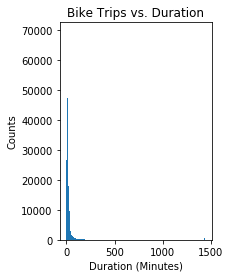

In [152]:
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, bikedata2019['duration'].max()+4, 4)
plt.hist(data = bikedata2019, x = 'duration', bins = bin_edges);
plt.xlabel('Duration (Minutes)');
plt.ylabel('Counts');
plt.title('Bike Trips vs. Duration');

As seen above the distribution is skewed to the right and most of the data is between 0 to 50. In order to visualize this much better, I must perform a transformation by filtering the outliers. 

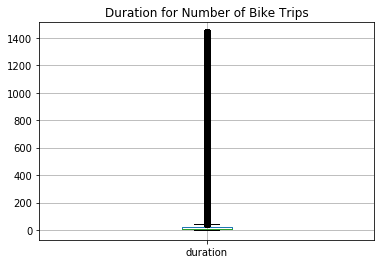

In [153]:
bikedata2019.boxplot('duration');
plt.title('Duration for Number of Bike Trips');

In [154]:
bikedata2019 = bikedata2019[bikedata2019['duration'] < 45]

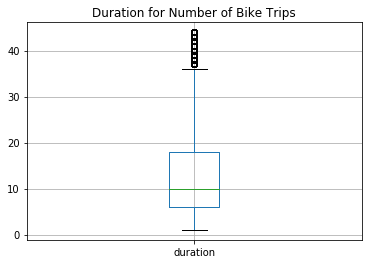

In [155]:
bikedata2019.boxplot('duration');
plt.title('Duration for Number of Bike Trips');

Now the data is much cleaner with only fewer outliers for durations. Having filtered out the outliers the histogram will be much easier to visualize. 

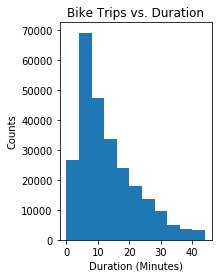

In [156]:
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, bikedata2019['duration'].max()+4, 4)
plt.hist(data = bikedata2019, x = 'duration', bins = bin_edges);
plt.xlabel('Duration (Minutes)');
plt.ylabel('Counts');
plt.title('Bike Trips vs. Duration');

The distribution of the graph is skewed to the right. There are more bike trips which lasted for 10 minutes. There were fewer bike trips that laster for 40 minutes or more. For more reasoning, I am going to discover more variables that are associated with number of bike users. 

#### Which bike type was used the most for trips?

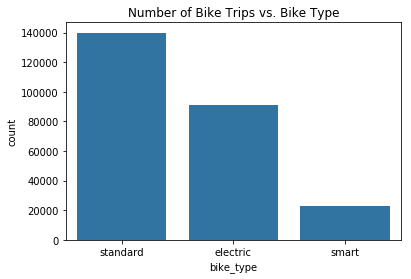

In [158]:
base_color = sb.color_palette()[0]
sb.countplot(data = bikedata2019, x='bike_type', color=base_color);
plt.title('Number of Bike Trips vs. Bike Type');

Standard bike was used the most for bike trips. Smart bikes were not used that ofter for trips. Now I need to check season to see which season has the most numbers of bike users. 

#### Which season has the highest number of bike trips?

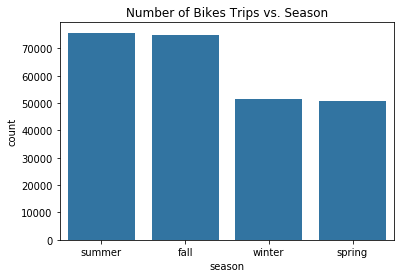

In [159]:
season_order = bikedata2019['season'].value_counts().index
sb.countplot(data=bikedata2019, x='season', color= base_color, order = season_order);
plt.title('Number of Bikes Trips vs. Season');

The bargraph above shows that many bike trips were conducted in the months of summer and fall than the winter and spring. Since winter is beginning of the year and end of the year I need to do a monthly analysis.

#### Which month had the most number of bike trips?

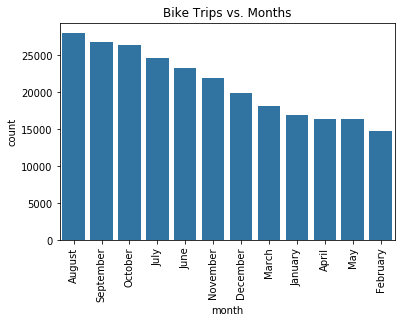

In [160]:
base_color = sb.color_palette()[0]
month_order = bikedata2019['month'].value_counts().index
sb.countplot(data=bikedata2019, x='month', color= base_color, order = month_order);
plt.xticks(rotation=90);
plt.title('Bike Trips vs. Months');

From the bar chart above, it shows that August was the month with the most numbers of bike trips. February was the month with least number of bike trips. 

#### How is Trip Route category associated with number of bike trips?

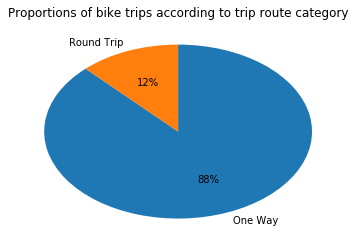

In [161]:
sorted_counts = bikedata2019['trip_route_category'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.0f%%', counterclock = False);
plt.title('Proportions of bike trips according to trip route category');

According to the pie chart above it can be seen that majority of people preferred one way trip than round trip.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

From the graphs above I found out that summer and fall were the season that most bikes trips conducted. August and September were the months with the most numbers of bike trips conducted. Since August, September and October are the warmest months in Los Angeles, CA, most people wanted to hire a bike, so that's is why there were more bike trips during those months.
Most people used standard bikes. 
However, there were some unusual point for Duration vs. Bike Trip Counts graph. I had to perform some transformations. 
I also discovered the proportions for one way and round trips.  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were some unusual distuibution for Duration vs. Bike Trip Counts graph. The graph was sharply skewed to the right. I found out the duration data had some extraneous outliers. I had to filter out the values that were greater than 45 minutes. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Which season had the most bike trips according to each of the bike types?

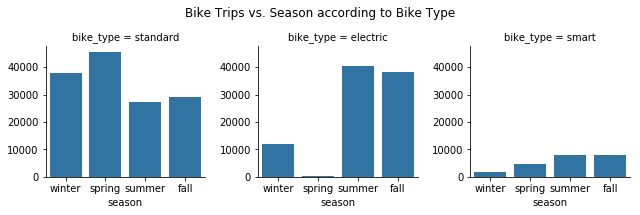

In [162]:
g = sb.FacetGrid(bikedata2019, col='bike_type');
g.map(sb.countplot, "season");
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Bike Trips vs. Season according to Bike Type');

For a standard bike spring season had the most number of bike trips. For electric and smart summer had the most for bike_trips. Normally during the coldest month, electric and smart bikes take a while to charge and can be dangerous to ride. For warmer months ebike and smart bikes are used more because they charge faster and the bike users don't get tired. Usually standard bike is cheaper than smart bike. I would do a monthly analysis for each bike type to explore the data in more details.

#### Which month has the most bike trips according to each of the bike types?

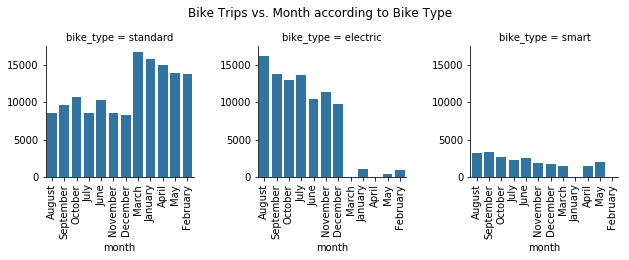

In [163]:
g = sb.FacetGrid(bikedata2019, col='bike_type');
g.map(sb.countplot, "month", order=month_order);
g.set_xticklabels(rotation = 90);
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Bike Trips vs. Month according to Bike Type');

It can be seen clearly, that in the months of August, September and July more electric bike were used since those were the warmest months of the year. In the coolest months more standard bikes were used and only fewer electric bikes were used. I am going to explore more with how duration, seasons, and trip category will determine the numbers of bike users. 

#### What is the distribution for duration according to seasons?

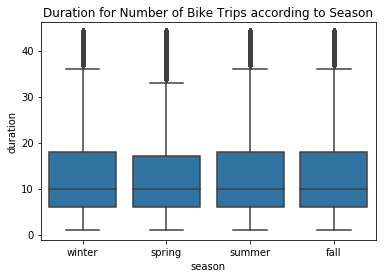

In [164]:
sb.boxplot(data = bikedata2019, x = 'season', y = 'duration', color = base_color);
plt.title('Duration for Number of Bike Trips according to Season');

The boxplot for each season are skewed to the top. The distribution is the same regardless of which season. Next I am going to display an histogram.

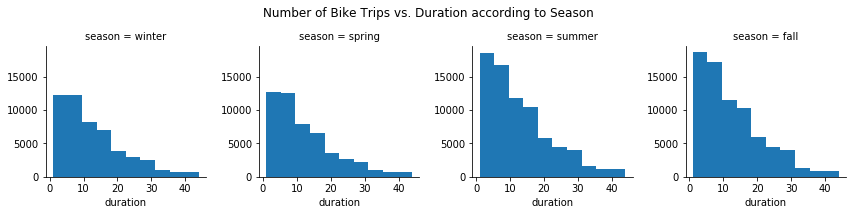

In [165]:
g = sb.FacetGrid(bikedata2019, col='season');
g.map(plt.hist, "duration");
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Number of Bike Trips vs. Duration according to Season");

For all the seasons, the bike count vs duration is skewed to the right. Next I am going to display a monthly analysis for duration.

#### What is the distribution for duration according to seasons?

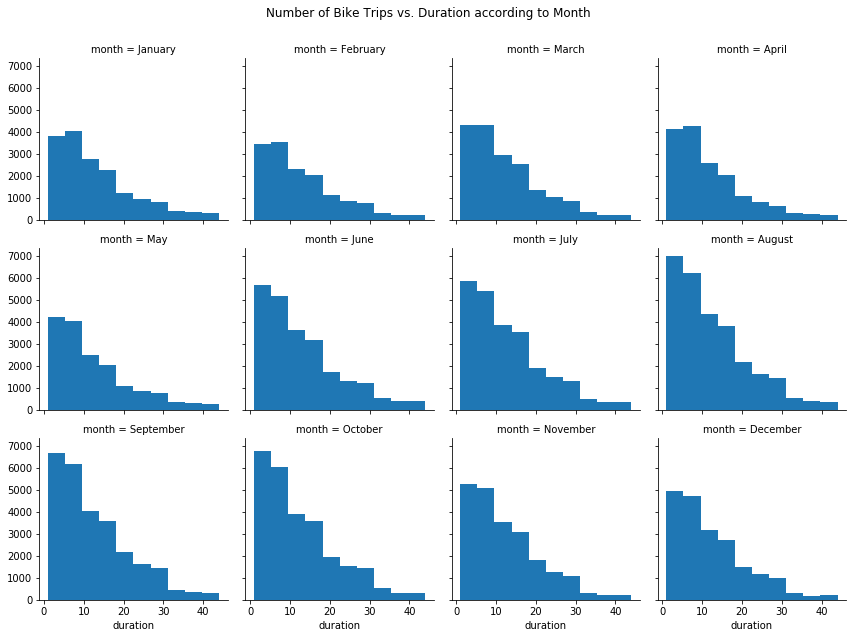

In [166]:
g = sb.FacetGrid(bikedata2019, col='month', col_wrap = 4);
g.map(plt.hist, "duration");
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Number of Bike Trips vs. Duration according to Month");

As seen above, there were more bike users in the warmer months (August, September, October). Still all the data are skewed to the right. Next I will show the distribution for duration according to bike_types.

#### What is the distribution for duration according to the bike_type?

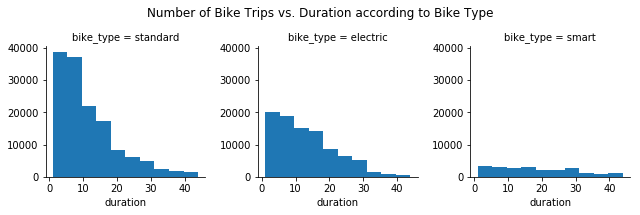

In [167]:
g = sb.FacetGrid(bikedata2019, col='bike_type');
g.map(plt.hist, "duration");
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Number of Bike Trips vs. Duration according to Bike Type");

For standard and electric bike type most trips were short. They are all skewed to the right. Surprisingly the smart bike is not skewed. There were only less than 1000 users. Next I will check the relationship between duration and trip route category.

#### What is the duration according to bike type?

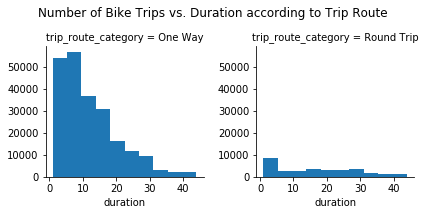

In [168]:
g = sb.FacetGrid(bikedata2019, col='trip_route_category');
g.map(plt.hist, "duration");
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Number of Bike Trips vs. Duration according to Trip Route");

Many bike user have duration for a trip route category which is one way. The duration accourding to number of bike userd is skewed to the right. For the rough trip the distribution is slightly skewed to the right. Next I will plot a barchart for trip route category according to the season.

#### What is the number of bike trips conducted for trip route category according to season?

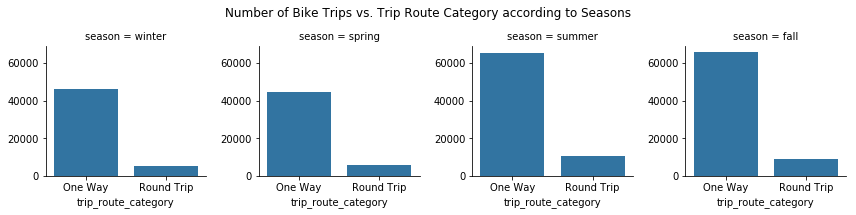

In [169]:
g = sb.FacetGrid(bikedata2019, col='season');
g.map(sb.countplot, 'trip_route_category');
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Number of Bike Trips vs. Trip Route Category according to Seasons");

For each season I observed that one way trip route has more number of bike trips than the round trip category. This can be due to the number of distance a person has traveled. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

For the first graph, I have noticed that spring and winter was when most of the standard bikes used than electric and smart. This was different from the one observed in the univariate distribution where I categorized, seasons with countplot. On average, the univariate data "Number of Bike Trips vs. Seasons" showed that most bikes were used in summer. By categorizing them in the bivariate section, I found out that according to each bike type there were some variations in the data. I had to do a monthly analysis for each bike type to come up with a stronger conclusion. Using the monthly analysis did give me a strong insight. So, standard bikes were used in the cooler months, whereas the electric bikes were used in the warmer months. 

For the boxplot of duration vs season boxplot. Each duration statistics of boxplot is categorized into each season. Then I had to do a histogram to gain a better understanding. But sometimes categorizing them into seasons may not give enough information, so I had to categorize the data into months. 

For the trip route category, I noticed that according to trip route category I found that bike trip count vs duration had a very weird shape. So I had to create another chart grouping trip category according to specific season. From this I found out that one way trip has more number of bike users than the round trip. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### What is the duration of the bike trip according to season and bike type? Are there any differences?

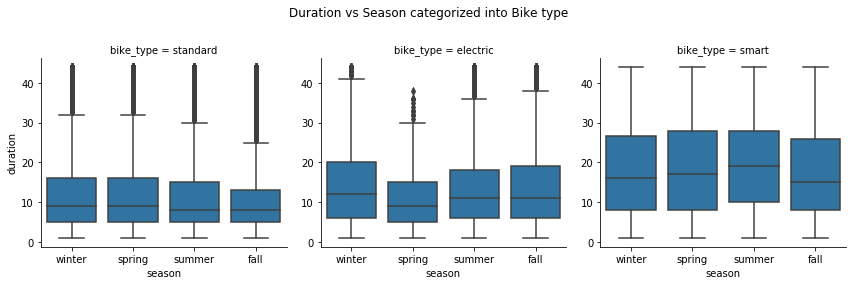

In [170]:
g = sb.FacetGrid(data = bikedata2019, col = 'bike_type', size = 4);
g.map(sb.boxplot, 'season', 'duration');
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Duration vs Season categorized into Bike type");

As shown here, there is a slight variation in the data. Usually smart bikes have longer duration than other bike types. Thats due to the cost of the smart bikes. The median duration for all bike types are between 9 to 15. None of the boxplots are symmetric. To gain more insight I will plot an histogram.

#### What is the duration distribution based on bike type and seasons?

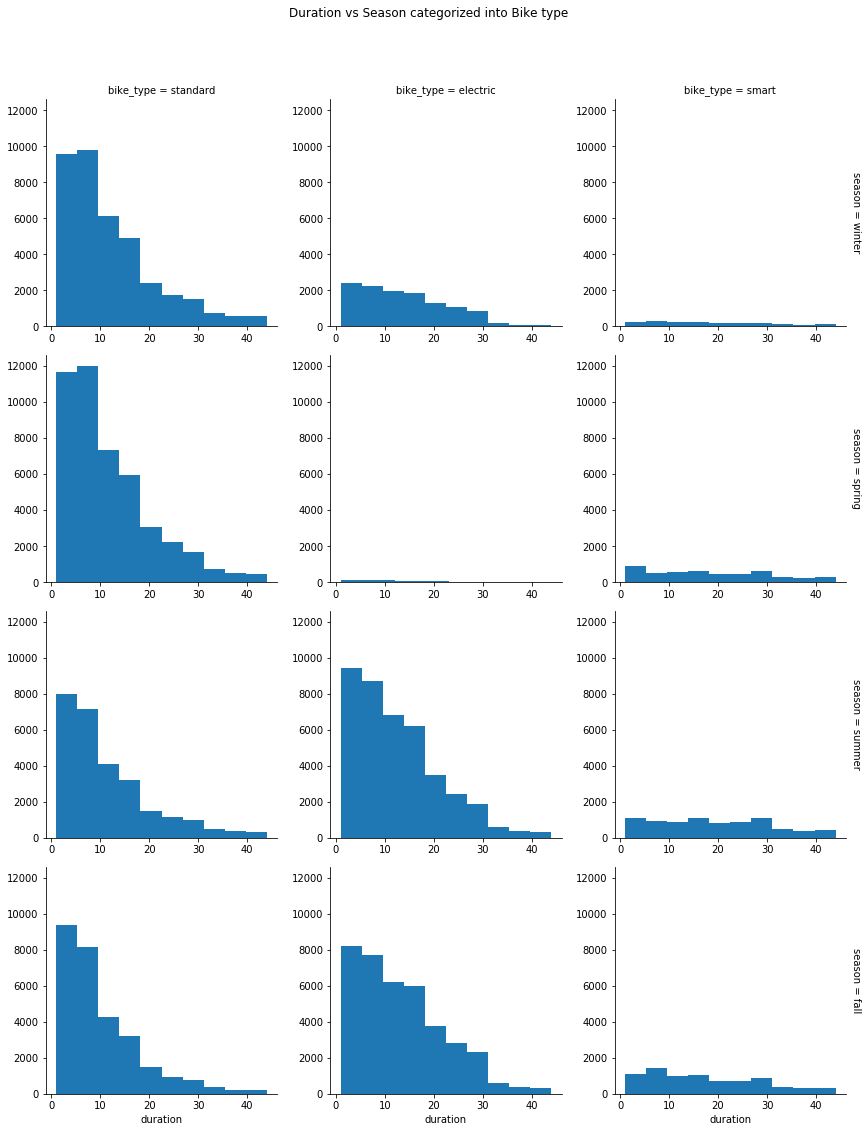

In [171]:
g = sb.FacetGrid(data=bikedata2019, col = 'bike_type', row = 'season', size = 4, margin_titles=True);
g.map(plt.hist, 'duration');
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Duration vs Season categorized into Bike type");

As shown above the months of summer and fall have more for smart and electric car than spring and winter. However, it is the opposite for standard bikes. Next to gain a better understanding of relationships I will have to combine bike_types with monthly analysis for duration count.

#### What is the duration distribution based on bike type and months?

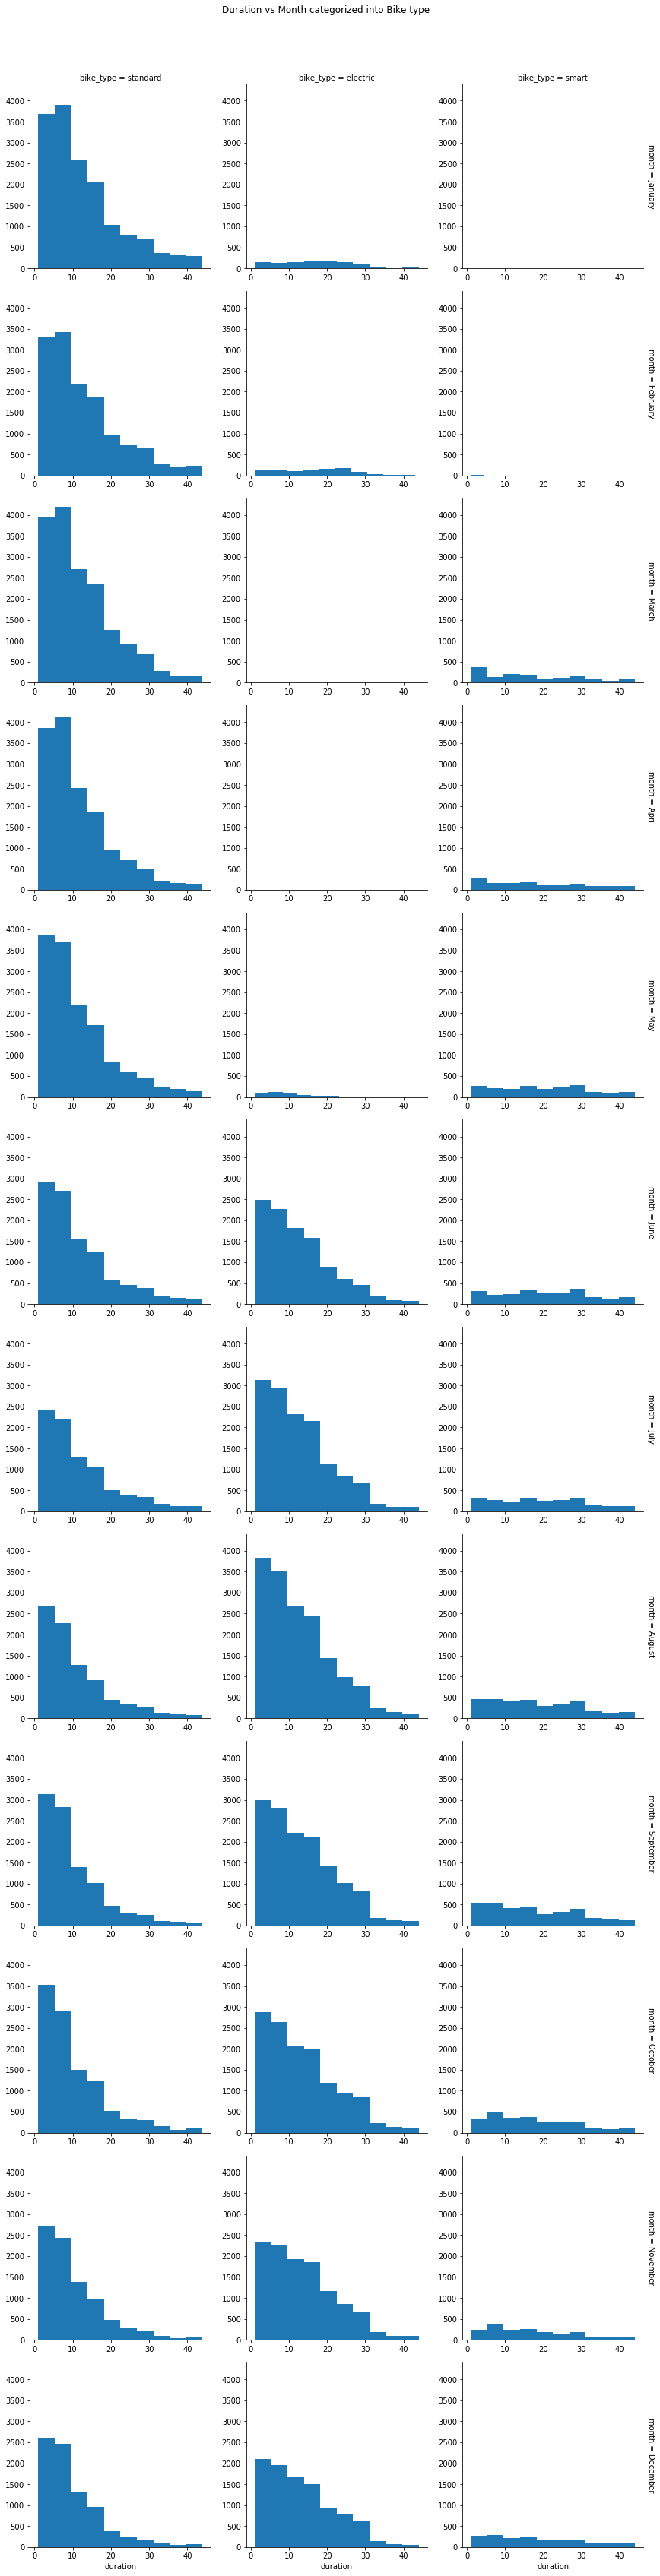

In [172]:
g = sb.FacetGrid(data=bikedata2019, col = 'bike_type', row = 'month', size = 4, margin_titles=True);
g.map(plt.hist, 'duration');
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Duration vs Month categorized into Bike type");

For standard bikes, in the cooler months (December to April) there are more standard bikes than electric bike and smart bikes. In the warmer months (June to October) there are more electric bikes. For most of the graphs, the duration is skewed to the right. This can be due to the dangers of using an electric bike in the cooler month. This can also be due to the expences of smart bikes. Next I am going to see how trip route category related with bike type and months.  

#### How many bike trips were used for bike trip category according to bike type and months?

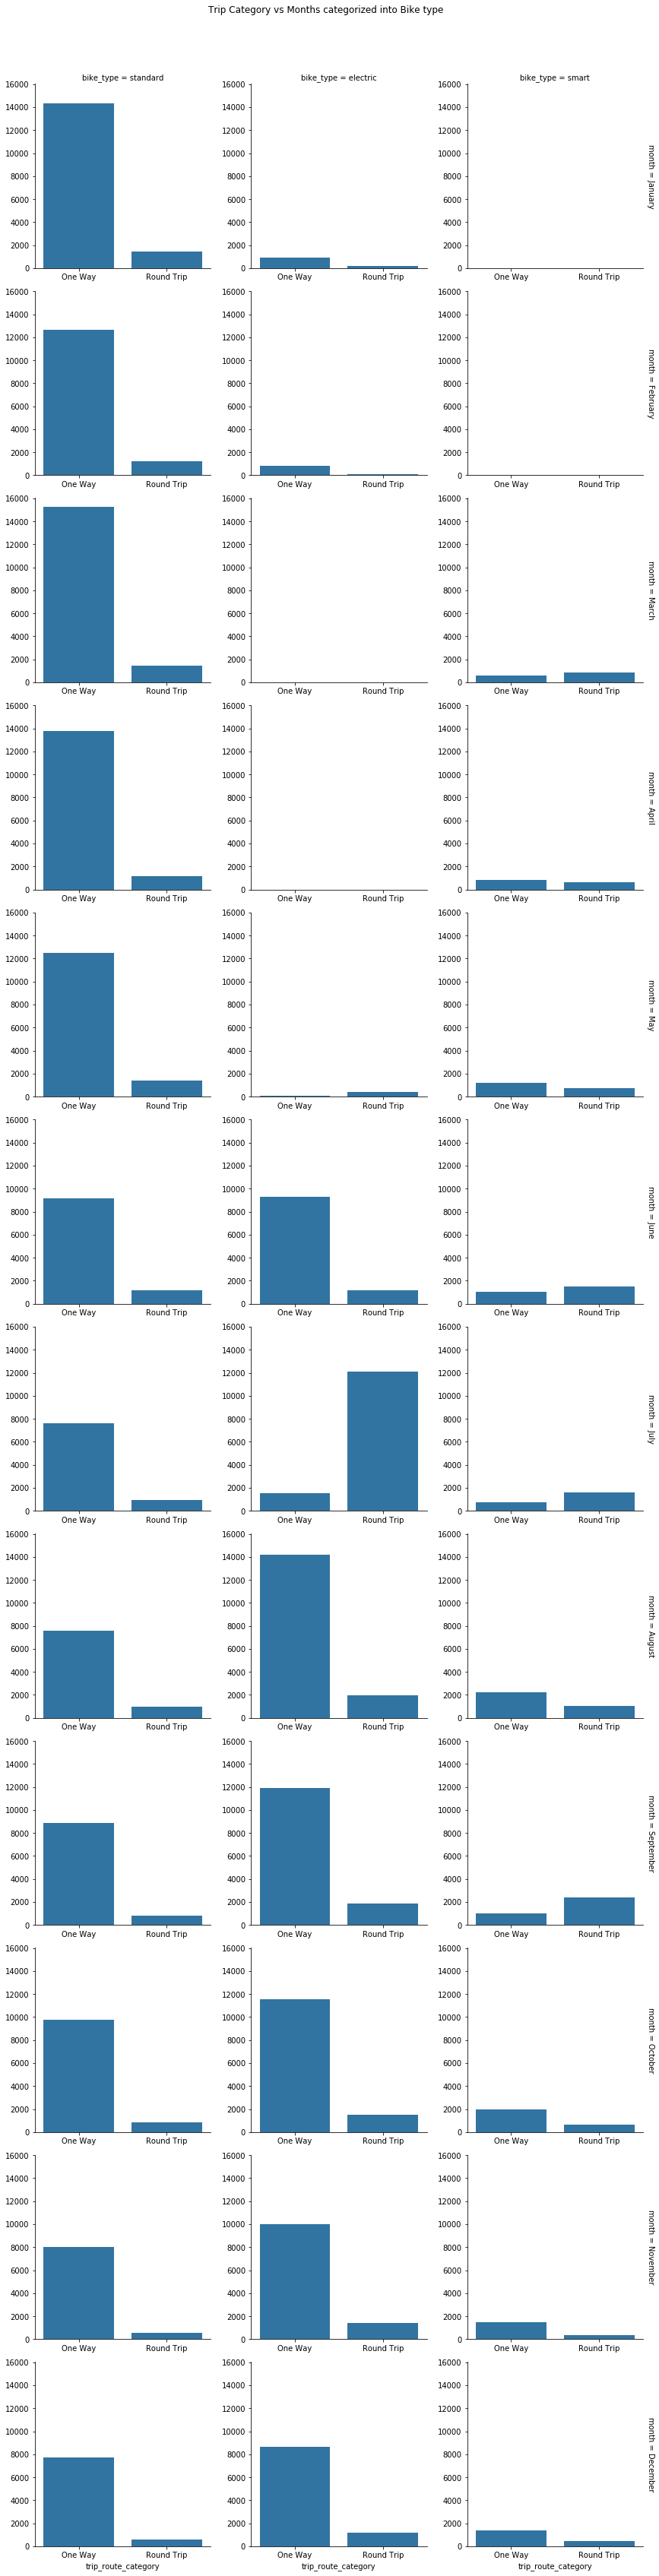

In [173]:
g = sb.FacetGrid(data = bikedata2019, col = 'bike_type', row = 'month', size = 4, margin_titles=True);
g.map(sb.countplot, 'trip_route_category');
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Trip Category vs Months categorized into Bike type");

- January- One way is greater than round trip
- February - One way is greater than round trip
- March - For standard one way is greater than round trip, smart car round trip is greater than one way.
- April - One way is greater than round trip.
- May - One way is greater than round trip but for electric round trip is greater than one way.
- June and September - For smart car round trip is greater than one way.
- July - For standard one way is greater than round trip.
- August - One way is greater than round trip.
- (October - December) - One way is greater than round trip.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

For the first graph I have noticed there is a skew in the boxplot datas. I had to do more visualizations to come up with better results that make sence. 
The histograms showed that regardless of which month and which bike types, the shorter duration appears to be more favored than longer durations. 

### Were there any interesting or surprising interactions between features?

For the trip category vs month by bike type, there were some interesting observations. 
There were some cases where round trip was greater than one way trip. There could be various reasons for that to happen. This was voluntary based on each month or could depend upon the cost of travelling.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!